# Data Analysis (Dr.Wang's data)

## 1 导入数据集

In [1]:
library("sas7bdat")

In [2]:
data <- read.sas7bdat('combined_geo_20_sample.sas7bdat', debug=FALSE)

In [1]:
# 查看数据
# data

In [2]:
# 查看数据结构
# str(data)

## 2 缺失值填补

In [3]:
# 初始数据集
x <- data$m_2vol_dw1 

summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   10.00   22.00   28.03   38.25  224.00      93 

In [7]:
# 初始数据集
x <- data$m_2vol_dw1

# 用中位数对缺失值进行填补
x[is.na(x)] <- median(x, na.rm=TRUE) 

summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   11.00   22.00   27.64   36.00  224.00 

In [8]:
# 初始数据集
x <- data$m_2vol_dw1 
# 删除缺失值
y <- na.omit(x) 
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   22.00   28.03   38.25  224.00 

## 3 日期格式处理

In [ ]:
# 转换时间，提取出数据的小时

for (i in 1:1945) {
    datetime <- data$date_time[i]
    datetime <- as.POSIXct(datetime, origin="1960-01-01 00:00:00")
    hour <- strftime(datetime,"%H")
    # print(hour)
    data$hour[i] <- hour
    # print(i)
}

# datetime <- min(data$date_time)
# datetime_date <- as.Date(as.POSIXct(datetime, origin="1960-01-01 00:00:00"))
# datetime_second <- as.POSIXct(datetime, origin="1960-01-01 00:00:00")

# as.POSIXct之后就已经是时间日期格式了，再加as.Date反而把时间部分给去掉了

## 4 绘制原始数据散点图

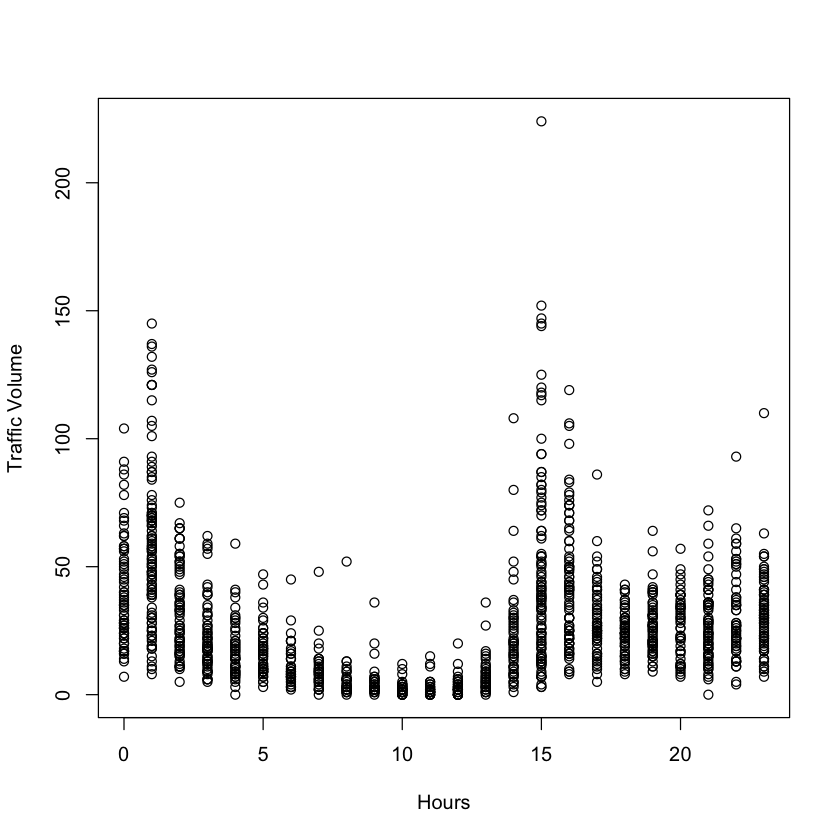

In [93]:
# 绘制多天数据（每个小时）累计散点图
plot(data$hour, data$m_2vol_dw1,
     xlab='Hours',
     ylab='Traffic Volume')

In [163]:
# 自编的笨办法（去除数据上下界之外的outlier）

new_data <- subset(data, hour=='00')

q3 <- quantile(new_data_01$m_2vol_dw1, 0.75, na.rm=TRUE)
q1 <- quantile(new_data_01$m_2vol_dw1, 0.25, na.rm=TRUE)
IQR <- (as.numeric(q3) - as.numeric(q1))
max_line <- as.numeric(q3 + 1.5 * IQR)

new_data <- subset(new_data, m_2vol_dw1 <= max_line)

for (i in 1:23) {
    # 制作字符串
    if (i < 10) char <- paste('0', as.character(i), sep='') else char <- as.character(i)
    # print(char)
    
    new_data_append <- subset(data, hour==char)
    
    q3 <- quantile(new_data_01$m_2vol_dw1, 0.75, na.rm=TRUE)
    q1 <- quantile(new_data_01$m_2vol_dw1, 0.25, na.rm=TRUE)
    IQR <- (as.numeric(q3) - as.numeric(q1))
    max_line <- as.numeric(q3 + 1.5 * IQR)

    new_data_append <- subset(new_data_append, m_2vol_dw1 <= max_line)
    new_data <- rbind(new_data, new_data_append)
    print(i)
}

用于PPT第32页展示的代码

In [ ]:
# Step1: 截取每小时的数据
data_hour <- subset(data, 
                    hour=='00')

# Step2: 获取箱线图极小值
min_bound <- boxplot.stats(
             data_hour$m_2vol_dw1
             )$stats[1] 
# Step3: 获取箱线图极大值
max_bound <- boxplot.stats(
             data_hour$m_2vol_dw1
             )$stats[5]
# Step4: 剔除异常值
data_hour <- subset(data_hour, 
    m_2vol_dw1 > min_bound) 
data_hour <- subset(data_hour, 
    m_2vol_dw1 < max_bound) 

# Step5: 合并数据

In [185]:
# 新方法：使用作弊的离群值筛选工具

new_data <- subset(data, hour=='00')

min_bound <- boxplot.stats(new_data$m_2vol_dw1)$stats[1] # 直接获取极小值，去掉后缀可查看全貌
max_bound <- boxplot.stats(new_data$m_2vol_dw1)$stats[5] # 直接获取极大值，去掉后缀可查看全貌
new_data <- subset(new_data, m_2vol_dw1 >= min_bound) # 剔除过小的异常值
new_data <- subset(new_data, m_2vol_dw1 <= max_bound) # 剔除过大的异常值

for (i in 1:23) {
    # 制作字符串
    if (i < 10) char <- paste('0', as.character(i), sep='') else char <- as.character(i)
    # print(char)
    
    new_data_append <- subset(data, hour==char)
    
    min_bound <- boxplot.stats(new_data_append$m_2vol_dw1)$stats[1] # 直接获取极小值，去掉后缀可查看全貌
    max_bound <- boxplot.stats(new_data_append$m_2vol_dw1)$stats[5] # 直接获取极大值，去掉后缀可查看全貌
    
    new_data_append <- subset(new_data_append, m_2vol_dw1 > min_bound) # 剔除过小的异常值
    new_data_append <- subset(new_data_append, m_2vol_dw1 < max_bound) # 剔除过大的异常值

    new_data <- rbind(new_data, new_data_append)
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23


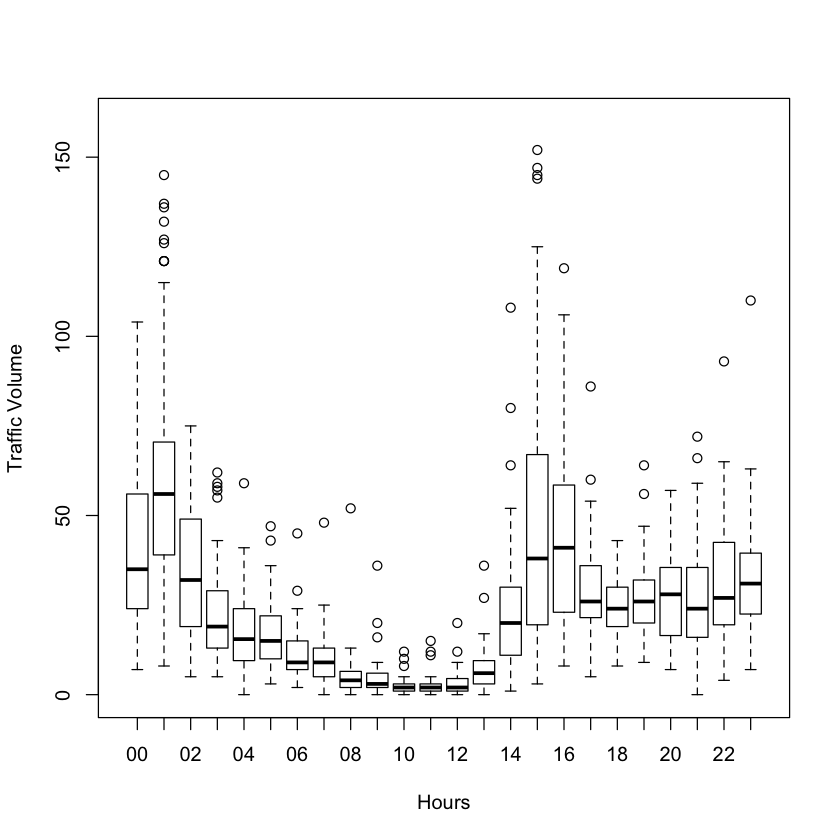

In [194]:
# 原始数据的箱型图
boxplot(data$m_2vol_dw1~data$hour,
        xlab='Hours',
        ylab='Traffic Volume',
        ylim=c(0,160)
       )

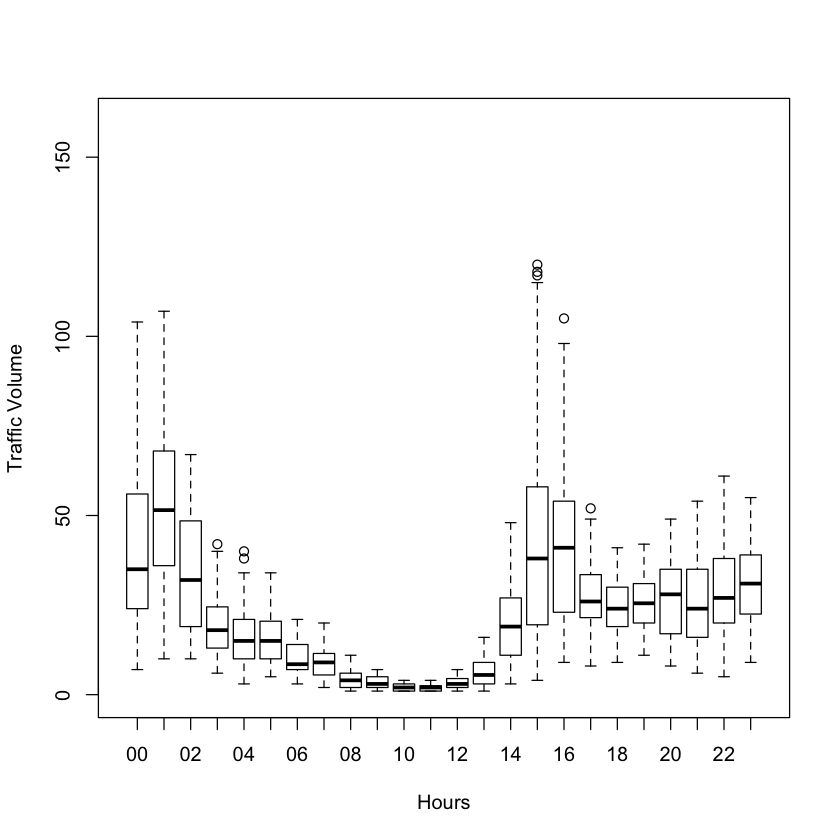

In [195]:
# 经过清洗后的数据

boxplot(new_data$m_2vol_dw1~new_data$hour,
        xlab='Hours',
        ylab='Traffic Volume',
        ylim=c(0,160)
       )

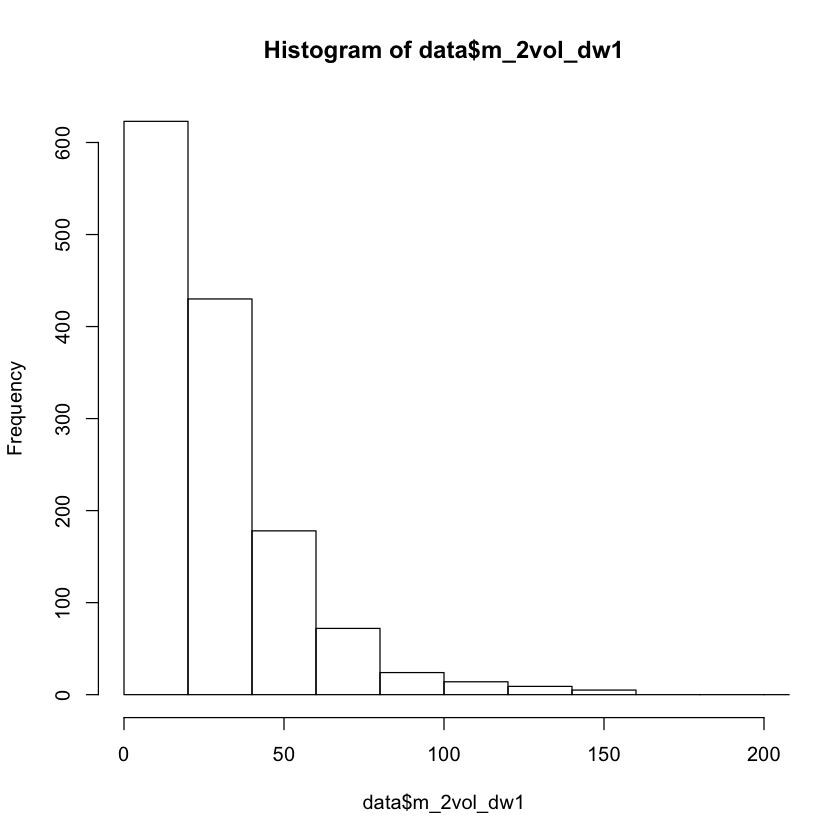

In [17]:
hist(data$m_2vol_dw1, 
     xlim=c(0,200), 
     breaks=10)

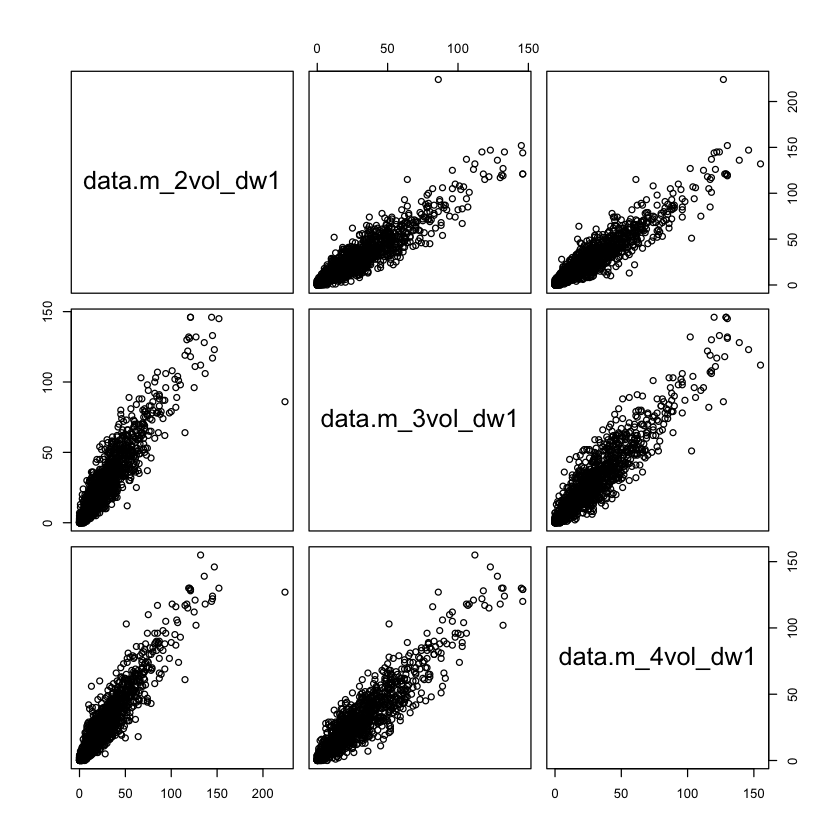

In [14]:
# 散点图矩阵
df <- data.frame(data$m_2vol_dw1, data$m_3vol_dw1, data$m_4vol_dw1)
pairs(df)

# 三维散点图
scatterplot3d(df, pch=16, type='h')

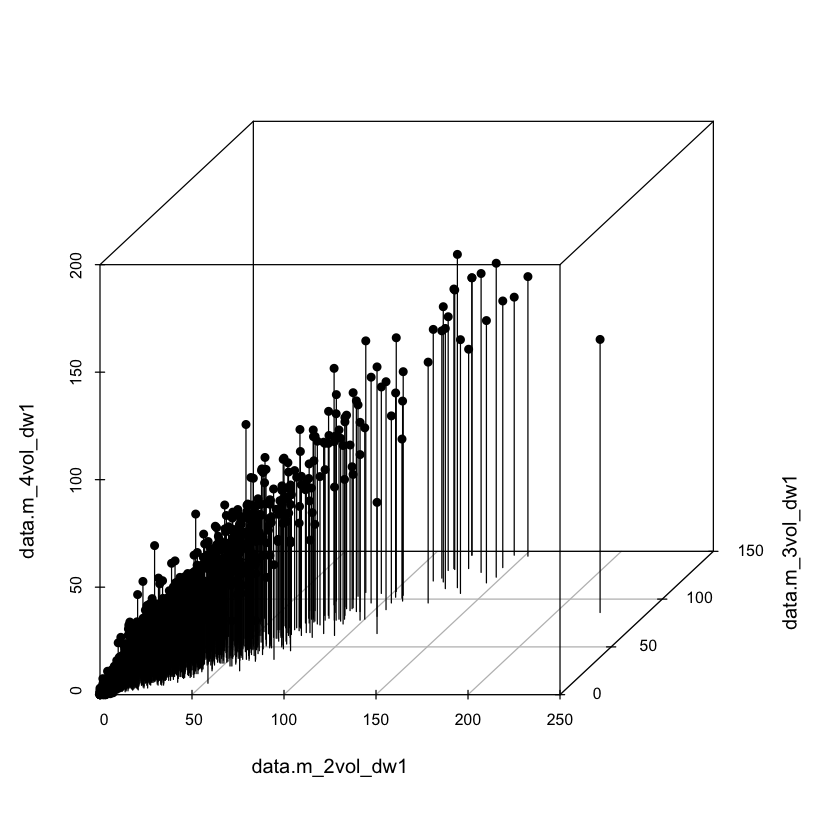

In [19]:
# 绘制三维图
library(scatterplot3d)
scatterplot3d(df, pch=16, type='h')